In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import scale

In [2]:
#sigmoid definition

def sigm(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))

In [3]:
##my neural network function

def neural_network(my_input,target,y,hidden_layer_size,gam=0.001,max_iter=10000,verbose=False):    
    
    gam = gam
    
    
    # takes in columns of input and output to make correctly shaped matrices

    my_input_shape = my_input.shape[1]
    target_shape = target.shape[1]
    
    #alias
    
    hls = hidden_layer_size
    
    #how many layer sizes there are determines the amount of matrices there will be
        #hidden layer stuff
        
    hsize = len(hls)
    hstop = hsize
    
    #for n hidden layers, there will be 1 input layer, and n hihdden layers, total = len(hidden_layer_size) + 1
        #mat stuff
        
    mat = [0]*(hsize+1)
    msize = len(mat)
    mstop = msize-1
    
    #there will be 4 multiplications input layer and n hidden layers
        #prod stuff
        
    prod = [0]*msize
    psize = len(prod)
    
    #there will n-1 errors from the last n-1 hidden layers
        #error stuff
        
    errors = [0]*(psize-1)
    estart = psize-2   
    esize = len(errors)
    
    #n-1 deltas from first 3 multiplications and errors (activation function on)
        #delta stuff
        
    deltas = [0]*esize    
    
    #loop through n+1 layer sizes to create input layer and n hidden layers
    
    for i in range(hsize+1):

        #make sure input layer has size from input and then first hls size
        
        if(i==0):

            mat[i] = (2*np.random.random((my_input_shape,hls[i])))-1
            
        
        #make sure output layer has last size from hls and encode shape
        
        elif(i==hstop):

            mat[i] = 2*np.random.random((hls[-1],target_shape))-1
        
        else:

            mat[i] = 2*np.random.random((hls[i-1],hls[i]))-1

    #have the model update for max_iter trials
    
    for j in range(max_iter):
        
        #create products
        
        for i in range(len(mat)):
            
            if(i==0):
                
                prod[i] = sigm(np.dot(my_input,mat[i]))
               
            else:
                
                prod[i] = sigm(np.dot(prod[i-1],mat[i]))

        #this is the model's prediction after its run through entire network
        
        out = prod[-1]
        
        # take the encode minus the out (last matrix in prod)
        
        out_error = target - out
        
        
        #gives updates on model every max_iter/10 trial
        
        if(verbose):
            if(j % (max_iter/10) == 0):
                
                print("Error at iteration ",j,": ", np.mean(np.abs(out_error)),'=======>',j*100/(max_iter),'% done.')
    
        #find out_delta using prediction and prediction error with activation function
        
        out_delta = out_error*sigm(out,deriv=True)*gam
        
        # find errors for each matrix in prod, goes in reverse order

        for i in range(estart, -1, -1):
            
            forward = estart - i

            if(i==estart):

                errors[i] = out_delta.dot(mat[i+1].T)
            
            else:
                
                errors[i] = np.dot(errors[i+1],(mat[i+1].T))

        #find rest of deltas and apply activation function on errors and products
        
        for i in range(esize):

            deltas[i] = errors[i]*sigm(prod[i],deriv=True)*gam
            

        #Update hidden layers with deltas
        
        for i in range(msize-1,-1,-1):
            
            forward = (msize-1) - i

            if(i==(msize-1)):
                
                mat[i] += prod[i-1].T.dot(out_delta)
                
            elif(i==0):
                
                mat[i] += my_input.T.dot(deltas[i])
            
            else:
                
                mat[i] += prod[i-1].T.dot(deltas[i])

    print('Model Accuracy: ', 1 - np.mean(np.abs(out_error)))
    plt.plot(y,c='b',label='Data')
    plt.plot(np.argmax(out,axis=1),c='r',label='Prediction')
    plt.legend()
    plt.show()

Error at iteration  0 :  0.46258873226410335 =======> 0.0 % done.
Error at iteration  100 :  0.24185772180762707 =======> 10.0 % done.
Error at iteration  200 :  0.2002338232623872 =======> 20.0 % done.
Error at iteration  300 :  0.17995440578717448 =======> 30.0 % done.
Error at iteration  400 :  0.16695894436911923 =======> 40.0 % done.
Error at iteration  500 :  0.157404136204225 =======> 50.0 % done.
Error at iteration  600 :  0.14979890731972476 =======> 60.0 % done.
Error at iteration  700 :  0.14343793964734694 =======> 70.0 % done.
Error at iteration  800 :  0.13794396933686462 =======> 80.0 % done.
Error at iteration  900 :  0.13309682558544442 =======> 90.0 % done.
Model Accuracy:  0.8712006125797584


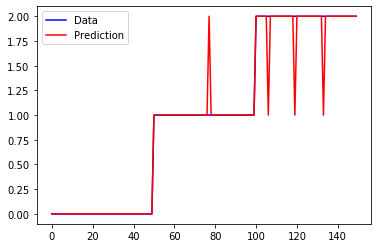

In [5]:
data = datasets.load_iris()
X = data["data"][:]  # petal width
y = (data["target"] )#.astype(np.int).T

XS=scale(X)
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(categories='auto')
y1hot = encoder.fit_transform(y.reshape(-1,1))

neural_network(XS,y1hot.toarray(),y,hidden_layer_size=(200,200,200),max_iter=1000,verbose=True)